In [ ]:
import pandas as pd

# Load the datasets
customers_path = '/content/Customers.csv'
products_path = '/content/Products.csv'
transactions_path = '/content/Transactions.csv'

customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

# Display the first few rows of each dataset to understand their structure
customers_head = customers.head()
products_head = products.head()
transactions_head = transactions.head()

customers_head, products_head, transactions_head


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [ ]:
# Merging datasets for a holistic view
transactions_merged = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

# Basic descriptive statistics and overview
overview = {
    "Transactions": transactions_merged.describe(include="all"),
    "Null Counts": transactions_merged.isnull().sum(),
}

# Unique customers, products, and transactions
unique_counts = {
    "Unique Customers": transactions_merged["CustomerID"].nunique(),
    "Unique Products": transactions_merged["ProductID"].nunique(),
    "Unique Transactions": transactions_merged["TransactionID"].nunique(),
}

# Top regions by transaction volume
region_transaction_counts = transactions_merged["Region"].value_counts()

# Top categories by sales
category_sales = transactions_merged.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)

# Customers with the highest transaction values
top_customers = transactions_merged.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(5)

overview, unique_counts, region_transaction_counts, category_sales, top_customers


({'Transactions':        TransactionID CustomerID ProductID      TransactionDate     Quantity  \
  count           1000       1000      1000                 1000  1000.000000   
  unique          1000        199       100                 1000          NaN   
  top           T00001      C0109      P059  2024-08-25 12:38:23          NaN   
  freq               1         11        19                    1          NaN   
  mean             NaN        NaN       NaN                  NaN     2.537000   
  std              NaN        NaN       NaN                  NaN     1.117981   
  min              NaN        NaN       NaN                  NaN     1.000000   
  25%              NaN        NaN       NaN                  NaN     2.000000   
  50%              NaN        NaN       NaN                  NaN     3.000000   
  75%              NaN        NaN       NaN                  NaN     4.000000   
  max              NaN        NaN       NaN                  NaN     4.000000   
  
         

<ipython-input-4-a9b46fc158f1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_transaction_counts.index, y=region_transaction_counts.values, palette="Blues_d")


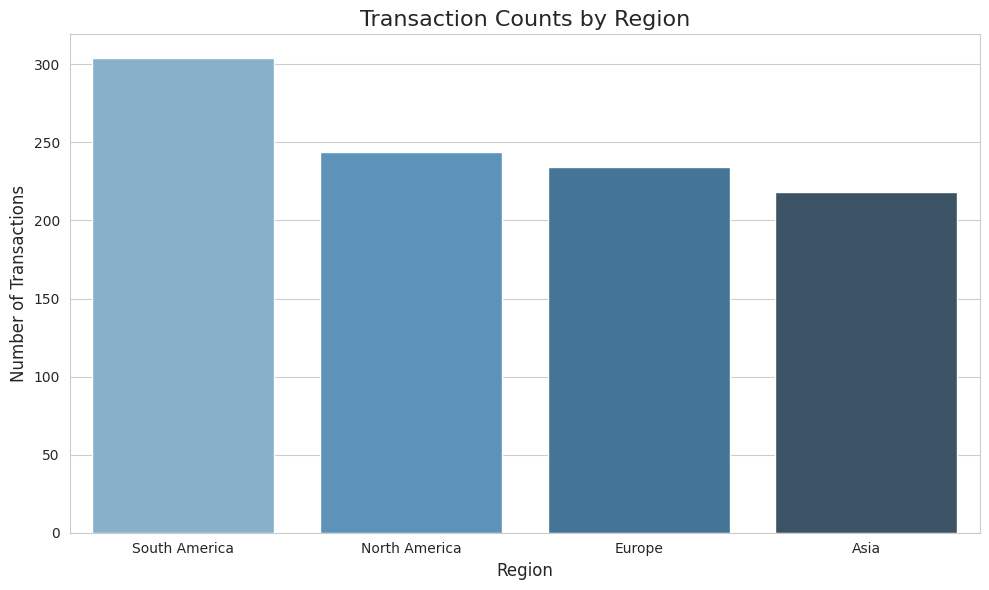

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure style
sns.set_style("whitegrid")

# Plot 1: Regional Transaction Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=region_transaction_counts.index, y=region_transaction_counts.values, palette="Blues_d")
plt.title("Transaction Counts by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

<ipython-input-5-6f24826262be>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales_sorted.index, y=category_sales_sorted.values, palette="Greens_d")


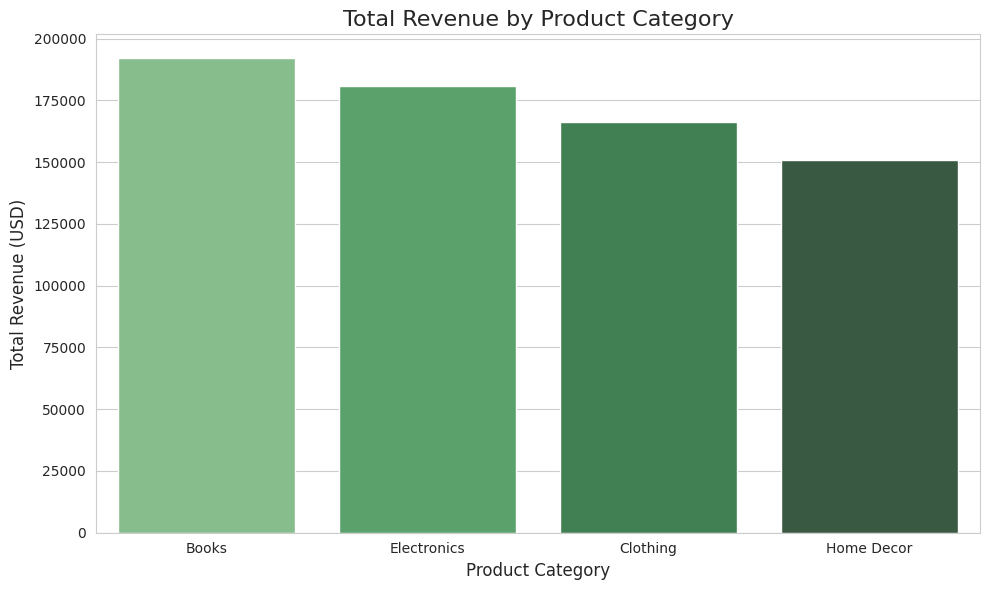

In [ ]:
# Plot 2: Revenue by Product Category
plt.figure(figsize=(10, 6))
category_sales_sorted = category_sales.sort_values(ascending=False)
sns.barplot(x=category_sales_sorted.index, y=category_sales_sorted.values, palette="Greens_d")
plt.title("Total Revenue by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

<ipython-input-6-ba4bf545bb71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


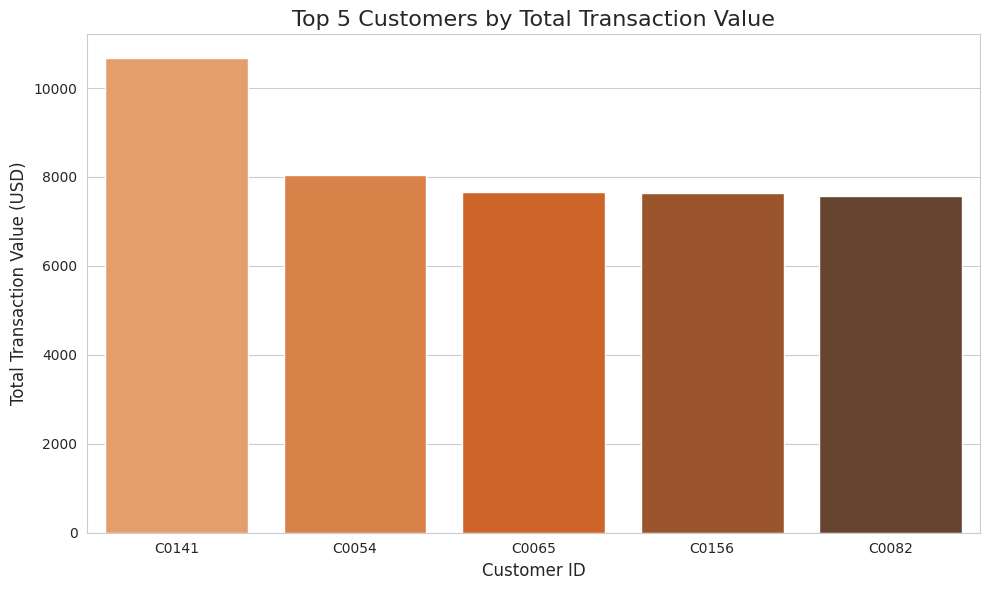

In [ ]:
# Plot 3: Top 5 Customers by Total Transaction Value
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_customers.index,
    y=top_customers.values,
    palette="Oranges_d"
)
plt.title("Top 5 Customers by Total Transaction Value", fontsize=16)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Transaction Value (USD)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

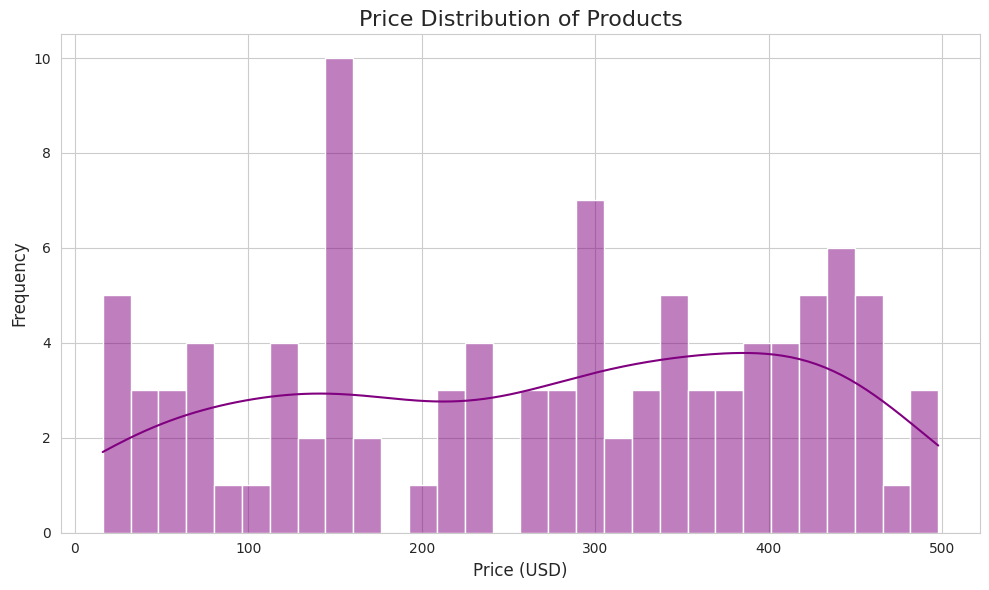

In [ ]:
# Plot 4: Price Distribution of Products
plt.figure(figsize=(10, 6))
sns.histplot(products["Price"], bins=30, kde=True, color="purple")
plt.title("Price Distribution of Products", fontsize=16)
plt.xlabel("Price (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

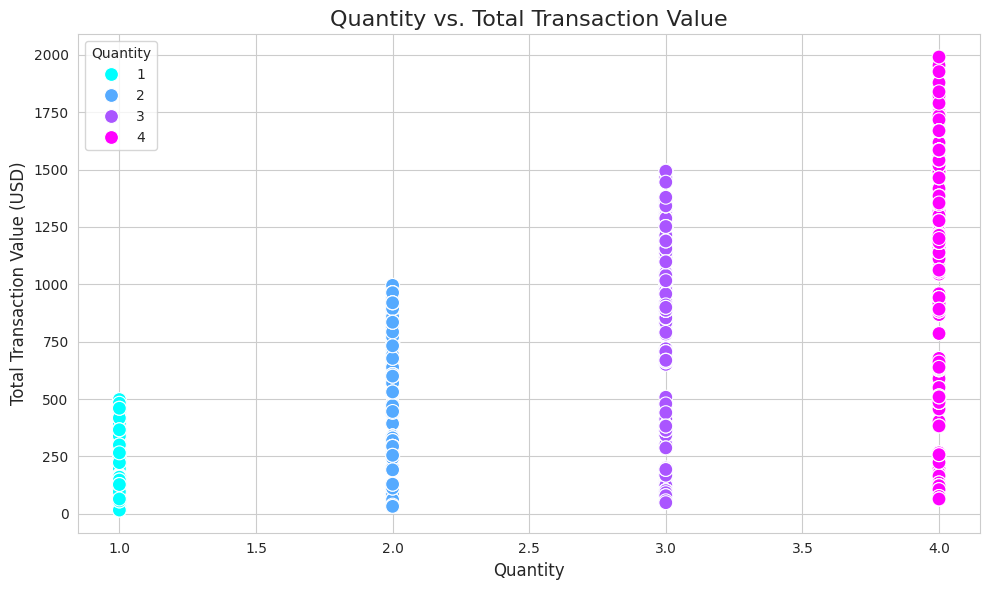

In [ ]:
# Plot 5: Quantity vs. Total Transaction Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x="Quantity", y="TotalValue", hue="Quantity", palette="cool", s=100)
plt.title("Quantity vs. Total Transaction Value", fontsize=16)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Total Transaction Value (USD)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Quantity", fontsize=10)
plt.tight_layout()
plt.show()